In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!ls "/kaggle/input/asl-alphabet"

asl_alphabet_test  asl_alphabet_train


In [1]:
base_path="/kaggle/input/asl-alphabet"

In [10]:
#Paths para cada data
path_train=base_path+"/asl_alphabet_train/asl_alphabet_train"
path_test=base_path+"/asl_alphabet_test/asl_alphabet_test"

In [11]:
clases=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U",
       "V","W","X","Y","Z","del","nothing","space"]

In [63]:
import os,glob
import pandas as pd

path_archivos=[]
list_labels=[]

#Cargo los datos en un dataframe: filename y label
def CargarDatos(path):
    for label in clases:
        label_path=os.path.join(path, label, "*") #Encontrar archivos en la ruta: path.join(path_train,label)
        img_files=glob.glob(label_path)

        sign_labels=[label]*len(img_files)

        path_archivos.extend(img_files)

        list_labels.extend(sign_labels)

    
    dataframe=pd.DataFrame({
        "file_path":path_archivos,
        "label":list_labels
    })
    
    return dataframe

In [67]:
#Carga de datos de train
train_df=CargarDatos(path_train)
train_df.head()

,file_path,label
0,/kaggle/input/asl-alphabet/asl_alphabet_train/...,A
1,/kaggle/input/asl-alphabet/asl_alphabet_train/...,A
2,/kaggle/input/asl-alphabet/asl_alphabet_train/...,A
3,/kaggle/input/asl-alphabet/asl_alphabet_train/...,A
4,/kaggle/input/asl-alphabet/asl_alphabet_train/...,A


In [94]:
str(train_df["file_path"].head(1))

'0    /kaggle/input/asl-alphabet/asl_alphabet_train/...\nName: file_path, dtype: object'

In [66]:
train_df.shape

(87000, 2)

In [81]:
#Divido un poco de la data de train para validación
from sklearn.model_selection import train_test_split
df_train,df_val=train_test_split(train_df,test_size=0.2,random_state=42,stratify=train_df["label"],shuffle=True)

In [96]:
df_train.head(9)

,file_path,label
691,/kaggle/input/asl-alphabet/asl_alphabet_train/...,A
73277,/kaggle/input/asl-alphabet/asl_alphabet_train/...,Y
75831,/kaggle/input/asl-alphabet/asl_alphabet_train/...,Z
75679,/kaggle/input/asl-alphabet/asl_alphabet_train/...,Z
23974,/kaggle/input/asl-alphabet/asl_alphabet_train/...,H
80579,/kaggle/input/asl-alphabet/asl_alphabet_train/...,del
83508,/kaggle/input/asl-alphabet/asl_alphabet_train/...,nothing
61209,/kaggle/input/asl-alphabet/asl_alphabet_train/...,U
12104,/kaggle/input/asl-alphabet/asl_alphabet_train/...,E


In [87]:
print(df_train.shape,df_val.shape)

(69600, 2) (17400, 2)


In [84]:
#Cargo la data, usando ImageDataGenerator y flow_from_dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(
    rescale=1/255,
)
val_gen=ImageDataGenerator(
    rescale=1/255
)

In [89]:
train_data_gen=train_gen.flow_from_dataframe(
    dataframe=df_train,
    directory=path_train,
    x_col="file_path",
    y_col="label",
    class_mode="sparse",
    target_size=(224,224),
    batch_size=20,
    shuffle=False
)

Found 69600 validated image filenames belonging to 29 classes.


In [ ]:
test_data_gen=val_gen.flow_from_dataframe(
    dataframe=df_val,
    directory=path_train,
    x_col="file_path",
    y_col="label",
    class_mode="sparse",
    target_size=(224,224),
    batch_size=20,
    shuffle=False
)

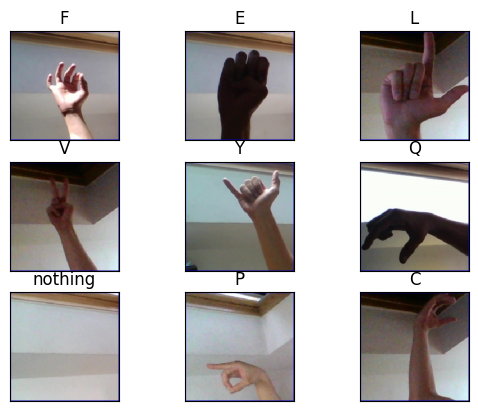

In [92]:
import matplotlib.pyplot as plt
for batch,label_batch in train_data_gen:
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([]),plt.yticks([])
        plt.title(clases[int(label_batch[i])])
        plt.imshow(batch[i])
    break